##  Seattle Crime Data Coding Challenge
- This coding challenge is not open ended.
- This is to ensure that you practice some basic data analysis skill.

In [1]:
%matplotlib inline
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crimes = pd.read_csv('./Crime_Data.csv.gz')
print(crimes.shape)
crimes.columns

(509236, 11)


Index(['Report Number', 'Occurred Date', 'Occurred Time', 'Reported Date',
       'Reported Time', 'Crime Subcategory', 'Primary Offense Description',
       'Precinct', 'Sector', 'Beat', 'Neighborhood'],
      dtype='object')

In [3]:
crimes.Precinct.unique()

array(['SOUTHWEST', 'WEST', 'NORTH', 'UNKNOWN', 'EAST', 'SOUTH', nan],
      dtype=object)

In [4]:
crimes.Beat.unique()

array(['W1', 'D1', 'L1', 'N3', 'Q2', 'J3', 'N2', 'Q3', nan, 'N1', 'E1',
       'B2', 'B1', 'W2', 'B3', 'M1', 'Q1', 'R2', 'G3', 'U3', 'L3', 'W3',
       'L2', 'G1', 'D2', 'D3', 'E3', 'J2', 'U2', 'K2', 'E2', 'O3', 'S1',
       'U1', 'J1', 'S2', 'M2', 'O1', 'S3', 'C1', 'O2', 'M3', 'F1', 'R3',
       'C2', 'C3', 'G2', 'K1', 'K3', 'F3', 'R1', 'W', 'S', 'F2', 'H1',
       'X9', 'CS', 'INV', 'CTY', 'LAPT', 'N', 'DET', 'SS', 'WS', 'K'],
      dtype=object)

## Question
- Report the names of the columns which have missingness

In [1]:
### Your Solution Here

## Question: 
- Report the numbers of distinct **Reported Dates** and distinct **Occurred Dates**, respectively.
- Convert the **Occurred Date** + **Occurred Time**, **Reported Date** + **Reported Time** from strings to datetime objects

- **Hint**: The panadas function **pd.to_datetime** can help

- The loaded Occurred/Reported Time appears to be a float like '1930.0'. This should be interpreted as '19:30:00' eventually
- Those time stamp like '30.0', '20.0' should be treated as missing values 

In [11]:
### Your Solution Here

There are 4508 distinct occurred dates
There are 4186 distinct reported dates


## Question: 
- Report the statistics (i.e. mean and std) of time gaps between **Reported Date** vs **Occurred Date**.
- Report the median lag of reporting time from event occurrance time.
- Why do the **mean lag** and the **median lag** differ so much?
- Plot the histogram of the distribution of **days**, how would you deal with the outliers?

In [13]:
### Your Solution Here

count                      509234
mean       7 days 15:37:55.236492
std      139 days 01:11:36.392617
min             -1 days +01:20:00
25%               0 days 00:03:00
50%               0 days 04:40:00
75%               0 days 20:49:00
max           36525 days 00:00:00
dtype: object

- The median lag is **4 hours 40 minutes**.
- The raw histogram below looks trivial as there is some outlier in the data.

(array([5.09061e+05, 1.48000e+02, 1.20000e+01, 8.00000e+00, 4.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.00000e+00,  3.65160e+03,  7.30420e+03,  1.09568e+04,
         1.46094e+04,  1.82620e+04,  2.19146e+04,  2.55672e+04,
         2.92198e+04,  3.28724e+04,  3.65250e+04]),
 <a list of 10 Patch objects>)

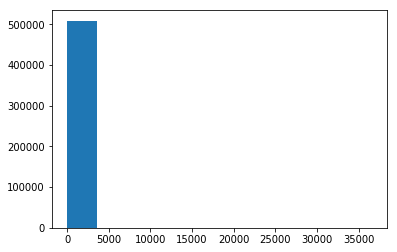

In [14]:
### Your Solution Here

(array([394765.,  36091.,  18342.,  10774.,   6835.,   5148.,   3922.,
          3385.,   2240.,  27732.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

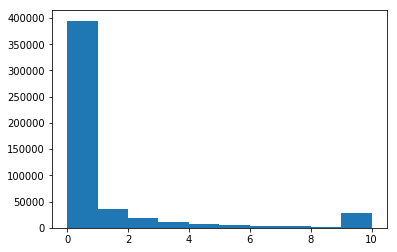

In [16]:
### Your Solution Here

(array([3.00000e+01, 3.94735e+05, 3.60910e+04, 1.83420e+04, 1.07740e+04,
        6.83500e+03, 5.14800e+03, 3.92200e+03, 3.38500e+03, 4.17600e+03]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 10 Patch objects>)

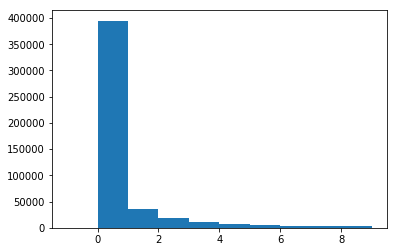

In [17]:
### Your Solution Here

## Question
- What time period has more prevalent crime occurance?
- In this question, we should treat any invalid/missing time value as missing and avoid to impute them.
- We group the 24 hours window into 6 groups '12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am'.

In [19]:
### Your Solution Here

- We round the hour to the next full hour modulo 24

In [21]:
### Your Solution Here

,value
time window,
4pm-8pm,119733
8pm-12am,116687
12pm-4pm,95817
8am-12pm,64078
12am-4am,49085
4am-8am,32425


## Conclusion
- Without conditioning on the crime types, the **4-8pm**, **8pm-12am** are the most prevalent time window for crimes.
- **12pm-4pm** follows.  Most of the crimes happen during the **12pm-12am** cycle and particularly **after the dark**.
- More insight should be gained when we combine the above analysis with the crime types.

## Question:
- Find all the crime subcategories in the data set and report the sample counts/subcategory.
- Which three subcategories have the top three event counts?

In [2]:
### Your Solution Here

- **Car Prowl** **Theft-All Other**, **Theft-Shoplift** are the top three subcategories.

## Grouping Subcategories into Eight Major Crime Types

- The crime subcategories are too fine-grained for our analysis.
- We regroup several subcategories together into $8$ major categories
- Thefts
- Burglary
- Robbery
- Alcohol_Drug
- Sex_Related
- Homicide
- Misc

In [3]:
### Your Solution Here

## Question: Neighborhood Crime Percentages 
- Report the event counts of each major crime type and report the ranking of **robbery**.

**Definition**: In the following, the major crime percentage refers to the percentage 
    of a single major crime type among the **8** types in a neighorhood.
    
- Which neighborhood has the highest **homicide** percentage?
- Which neighborhood has the highest **burglary** percentage?
- Which neighborhood has the highest **robbery** percentage?

## Step 1:
- Construct a dictionary (mapping) from the subcategories to the corresponding major crime types 
- For example, we would like to map **CAR PROWL**, **MOTOR VEHICLE THEFT**, ... to 'thefts'.
- We would like to map **ROBBERY-STREET**, **ROBBERY-RESIDENTIAL**,... to 'robbery', etc.

In [4]:
### Your Solution Here

- Create a new column called (crime) classification by mapping using a lambda function constructed by the above
mapping dictionary.

In [5]:
### Your Solution Here

## Question
- In the following, restrict to crime events occurred in-between **2008-2018**.
- Report the crime event counts in terms of **occurred years**. 
- Which year has the lowest and highest crime event counts, respectively?
- Report the crime event counts in terms of **occurred year-quarters**.
- Which **year-quarter** has the lowest and highest crime event counts, respectively?

- To answer the above questions, create two columns named **Year**, **Year_Quarter**, respectively.

In [6]:
### Your Solution Here

- Select years to be within **2008** to **2018**

In [7]:
### Your Solution Here

## Question (continuation)
- In terms of **winter**, **spring**, **summer**, and **autumn** quarters, what is the average quarterly crime count in each quarter?
- Display your insight using a bar plot.

In [8]:
### Your Solution Here

## Conclusion 

- On average the **winter** quarter has the lowest crime count while the **summer** quarter has the highest crime count.
- To make sure that this observation is sound, we perform a one-way **ANOVA** F-test on these populations 

In [9]:
from scipy.stats import f_oneway

In [10]:
### Your Solution Here

## Summary 
- Notice that we compare the winter vs summer quarters only.  The **p-value** is slightly below the $5\%$ threshold.
- Based on $5\%$ condidence, we can reject the null hypothesis and accept the alternative. 
- Based on the current data, it seems that there is a significant difference between the winter vs summer crime counts.
- We may speculate that the weather has played an essential role here.
- If we test all four quarters together, the **p-value** would be in-significant. This indicates that the additional
**spring**, **autumn** quarters make the water muddy.

## Question
- Analyze the crime prevalence in terms of week days.
- Which weekday (Sunday, Monday, ....Saturday) has highest/lowest average daily crime count?

In [11]:
### Your Solution Here

## Summary
- **Sunday** has lowest average daily crime count.
- **Friday** has the highest average daily crime count.
- **Monday-Thursday** daily crime counts are relatively unchanged.

## Question: 
- What happens to the week day's daily crime counts if we break the data into different crime types?
- Generalize your previous analysis to rank the weekdays (according to the average daily crime count) of each major crime type.

In [12]:
### Your Solution Here

## Obervations

- **alcohol_drug**, **physical_harm**, **robbery** are most prevalent on Saturdays.
- **burglary**, **sex_related**, **thefts** and *misc** are most prevalent on Fridays.
- **homicide** are most prevalent on Wednesdays.

## Question
- Study the crime prevalence for different major crime types, i.e. what are the **most active** time-window for each major crime type?   

- We will analyze the **mappedTimeWindow** and the **Classification** column of crimes dataframe.

In [54]:
X  = pd.DataFrame({'time window':mappedTimeWindows, 'major crime type':crimes['Classification'], 'value':np.ones_like(mappedTimeWindows)}).dropna()
X  = X.groupby(['time window', 'major crime type']).count().reset_index().pivot(index='time window', columns='major crime type', values='value')

In [55]:
topTimeWindow = {}
for crimeType in X.columns[1:] :
         topTimeWindow[crimeType] = X[crimeType].sort_values(ascending=False).head(3).index
topTimeWindow = pd.DataFrame(topTimeWindow)

topTimeWindow.index = ['top', 'second', 'third']

topTimeWindow

,alcohol_drug,burglary,homicide,misc,physical_harm,robbery,sex_related,thefts
top,8pm-12am,4pm-8pm,12am-4am,12pm-4pm,8pm-12am,8pm-12am,8pm-12am,4pm-8pm
second,12am-4am,8am-12pm,8pm-12am,4pm-8pm,4pm-8pm,4pm-8pm,4pm-8pm,8pm-12am
third,4pm-8pm,12pm-4pm,4pm-8pm,8am-12pm,12am-4am,12am-4am,12pm-4pm,12pm-4pm


## Summary
- For majority of the major crime types, **12pm-4pm**, **4-8pm**, **8pm-12am** are the hot windows (parallel to the
aggregate).
- The exceptions are **alcohol_drug**, **homicide**, **physical harm**, **robbery**, **misc**, where the morning hours
pop up.

- For **thefts/burglary**, the prime time is **4-8pm**.
- For **alcohol_drug/physica_harm/robbery/sex_related crimes**, **8pm-12am** is the most popular time.
- For **homicide**, after midnight **12-4am** is the most popular time window.

## Question
- construct a table of quarterly crime counts of each major crime type.
    - The index should be ['2008Q1', ...., '2018Q4']
    - Each column is the time series of a given crime type. 
- For each raw time series, please compute the rolling 4-quarter moving average, please remove the missing values from your answer.
- Plot the raw time series (dash line) and **rolling-mean** time series (solid line) of each major crime type
- Report your insights on **alcohol_drug**, **burglary**, **physical_harm**, **thefts**. In terms of crime prevention, what types of crimes are of higher alert?
- Which major crime type shows a clear annual seaonality?

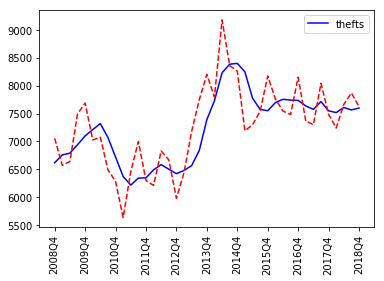

In [59]:
### Your Solution Here

## Summary:

- **alcohol_drug**: shows a downward trend and bounces back slightly after **2015**.
- **burglary**: shows a clear upward trend.
- **physical_harm**: shows a clear upward trend.
- **thefts**: jumps upward between two plateaus.
    
- **physical_harm** shows a clear yearly seasonality.    


## Question--Most Dangerous Neighborhood for 2019
- Among the neighborhoods of Seatle, develop a score to rank the neighorhoods' safety.  
- List the top 10 most dangerous neighorhood in Seatle.
- The scores are computed by the $2008-2018$ historical quarterly crime event counts based on the following rules.
   - Different major crime types are weights differently according to the following recipe:
   - **alcohol_drug**:2
   - **burglary**:6
   - **homicide**:20
   - **misc**:1
   - **physical_harm**:14
   - **robbery**:8
   - **sex_related**:10
   - **thefts**:2 
- To prevent that the quarters of the earlier years dominate the score, the quarterly counts are discounted according to
the following schedule.
- **2018Q4** is of factor $1$.
- Previous quarter has a discount factor of $\lambda = 0.95$. In other words, **2018Q3** has a discount factor $0.95$ and
**2018Q2** has the discount factor $0.95^2$, etc.

In [13]:
### Your Solution Here

- Firstly, try an example neighborhood 'ALKI'

In [14]:
### Your Solution Here

- Next, handle the general case looping through the groupby object

In [15]:
### Your Solution Here

## Question

- For each year and quarter in between $2008$ and $2018$, please report the ranking of the precincts in each crime category.
- For example the first quarter in 2009 should be denoted as '2009Q1'

In [16]:
### Your Solution Here

## Question:
- There are altogether $44$ quarters in-between $2008$ and $2018$. In each major crime category, 
a precinct is the quarterly winner (and quarterly loser, respectively) in that particular quarter if it has the lowest (highest) total crime count in that category.
- Report the total number of quarters a precinct wins and loses in each major crime category.
- Across all $44$ quarters, a precinct wins if it has the maximal count of quarterly winners. Likely a precint loses
 in that crime category if it has the maximal count of quarterly losers.
- Please identify the over winner and loser for each major crime category.

In [17]:
### Your Solution Here

- To find the winner precint/major crime type, we find the argmax (called **idxmax**) along the column axis.

In [18]:
### Your Solution Here

- Using the above gauge, the **North** precint is the weakest among all precints.

In [19]:
### Your Solution Here

- The strongest precint is **Southwest** precint.